In [1]:
# 分析に必要なライブラリをインポート
import pandas as pd
import numpy as np

In [2]:
# データセットを読み込む
df = pd.read_csv("dataset/winequality-red.csv")

In [3]:
# データの先頭行を表示する
df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


- 列ごとに表示されていないので、読み込み方を工夫する必要がある
- ;（セミコロン）で列に分割することができそうだ
- sep=';'を追記して、列に分割してみよう

In [4]:
# データセットを読み込む
df = pd.read_csv("dataset/winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- データテーブルとして綺麗に列を分割して表示されている

## カラム名一覧を取得しよう

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### カラム名を日本語に翻訳してみよう
---
分析するときは英語サイトに飛ぶことが多いけど、google翻訳で乗り切ってるもんよ！

| 英語 | google翻訳 | 修正した日本語訳 |
|:-----------|------------:|:------------:|
|  fixed acidity | 固定酸度 | This |
| volatile acidity | 揮発性の酸味 | This |
|  citric acid | クエン酸 | This |
|  residual sugar | 残留糖 | This |
|  chlorides | 塩化物 | This |
|  free sulfur dioxide | 遊離二酸化硫黄 | This |
|  total sulfur dioxide | 総二酸化硫黄 | This |
|  density | 密度 | This |
|  pH | pH | This |
|  sulphates | 硫酸塩 | This |
| alcohol | アルコール | This |
| quality | 品質 | This |

#### サクッとデータの大きさを見る

In [6]:
df.shape

(1599, 12)

- およそ1600件のデータである
- 説明変数は12個程度

#### このデータの中で実際に使えるデータの個数を調べる

In [7]:
df.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

- 今回は欠損はなさそう
- 異常値が入っていないかは注意して進める

#### 分析を開始するに当たり、データ型を確認する

In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

- 64bitの浮動小数点数なので数値
- モデルは作りやすい形になっている

#### サクッと統計量を見て、全体感を把握する

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- コピって、スプレッドシートに貼り付けたほうが早いことを伝える

In [10]:
# 可視化ライブラリのインポート
import matplotlib.pyplot as plt
import seaborn as sns

(array([  2.,   7.,  10.,  10.,  16.,  13.,  29.,  59.,  54.,  74.,  88.,
        168.,  96.,  95.,  95., 113.,  66.,  46.,  58.,  88.,  38.,  31.,
         26.,  64.,  29.,  32.,  36.,  18.,  12.,  12.,  30.,   6.,  19.,
          5.,  16.,   8.,   7.,   3.,   7.,   1.,   3.,   1.,   1.,   0.,
          0.,   0.,   2.,   0.,   4.,   1.]),
 array([ 4.6  ,  4.826,  5.052,  5.278,  5.504,  5.73 ,  5.956,  6.182,
         6.408,  6.634,  6.86 ,  7.086,  7.312,  7.538,  7.764,  7.99 ,
         8.216,  8.442,  8.668,  8.894,  9.12 ,  9.346,  9.572,  9.798,
        10.024, 10.25 , 10.476, 10.702, 10.928, 11.154, 11.38 , 11.606,
        11.832, 12.058, 12.284, 12.51 , 12.736, 12.962, 13.188, 13.414,
        13.64 , 13.866, 14.092, 14.318, 14.544, 14.77 , 14.996, 15.222,
        15.448, 15.674, 15.9  ]),
 <a list of 50 Patch objects>)

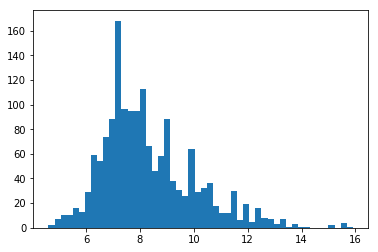

In [11]:
plt.hist(df['fixed acidity'], bins=50)

(array([  3.,   2.,  15.,  17.,  36.,  54.,  73.,  72.,  99., 107., 100.,
         74.,  61., 103.,  85., 107., 123., 104.,  75.,  66.,  41.,  38.,
         35.,  16.,  18.,  14.,  15.,  10.,   8.,   4.,  10.,   4.,   1.,
          1.,   2.,   0.,   2.,   0.,   1.,   0.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.12  , 0.1492, 0.1784, 0.2076, 0.2368, 0.266 , 0.2952, 0.3244,
        0.3536, 0.3828, 0.412 , 0.4412, 0.4704, 0.4996, 0.5288, 0.558 ,
        0.5872, 0.6164, 0.6456, 0.6748, 0.704 , 0.7332, 0.7624, 0.7916,
        0.8208, 0.85  , 0.8792, 0.9084, 0.9376, 0.9668, 0.996 , 1.0252,
        1.0544, 1.0836, 1.1128, 1.142 , 1.1712, 1.2004, 1.2296, 1.2588,
        1.288 , 1.3172, 1.3464, 1.3756, 1.4048, 1.434 , 1.4632, 1.4924,
        1.5216, 1.5508, 1.58  ]),
 <a list of 50 Patch objects>)

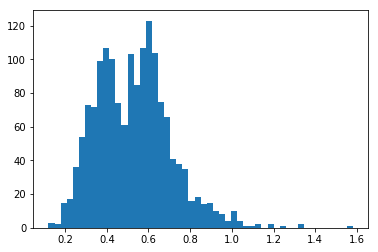

In [12]:
plt.hist(df['volatile acidity'], bins=50)

(array([165.,  80.,  49.,  46.,  63.,  50.,  45.,  40.,  25.,  43.,  58.,
         52.,  78.,  58.,  40.,  60.,  57.,  37.,  39.,  42.,  45.,  44.,
         45.,  37.,  91.,  33.,  31.,  25.,  17.,  17.,  11.,  11.,  16.,
         16.,  17.,   1.,   4.,   5.,   3.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

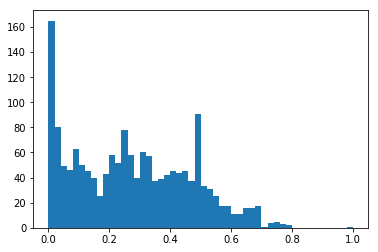

In [23]:
plt.hist(df['citric acid'], bins=50)

(array([  2.,  48., 168., 404., 372., 251., 113.,  48.,  29.,  22.,  23.,
         18.,  12.,   4.,  10.,   9.,  11.,  11.,   8.,   6.,   1.,   2.,
          1.,   5.,   2.,   3.,   1.,   4.,   0.,   0.,   0.,   0.,   0.,
          1.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,
          3.,   0.,   0.,   0.,   0.,   3.]),
 array([ 0.9  ,  1.192,  1.484,  1.776,  2.068,  2.36 ,  2.652,  2.944,
         3.236,  3.528,  3.82 ,  4.112,  4.404,  4.696,  4.988,  5.28 ,
         5.572,  5.864,  6.156,  6.448,  6.74 ,  7.032,  7.324,  7.616,
         7.908,  8.2  ,  8.492,  8.784,  9.076,  9.368,  9.66 ,  9.952,
        10.244, 10.536, 10.828, 11.12 , 11.412, 11.704, 11.996, 12.288,
        12.58 , 12.872, 13.164, 13.456, 13.748, 14.04 , 14.332, 14.624,
        14.916, 15.208, 15.5  ]),
 <a list of 50 Patch objects>)

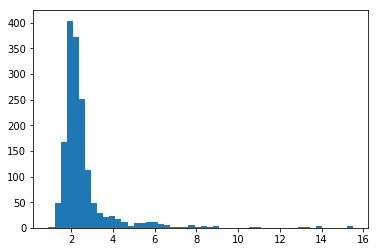

In [13]:
plt.hist(df['residual sugar'], bins=50)

(array([  2.,  61., 394., 765., 234.,  65.,  11.,  17.,   7.,   4.,   9.,
          5.,   3.,   0.,   0.,   0.,   4.,   4.,   1.,   2.,   7.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([0.012     , 0.03196667, 0.05193333, 0.0719    , 0.09186667,
        0.11183333, 0.1318    , 0.15176667, 0.17173333, 0.1917    ,
        0.21166667, 0.23163333, 0.2516    , 0.27156667, 0.29153333,
        0.3115    , 0.33146667, 0.35143333, 0.3714    , 0.39136667,
        0.41133333, 0.4313    , 0.45126667, 0.47123333, 0.4912    ,
        0.51116667, 0.53113333, 0.5511    , 0.57106667, 0.59103333,
        0.611     ]),
 <a list of 30 Patch objects>)

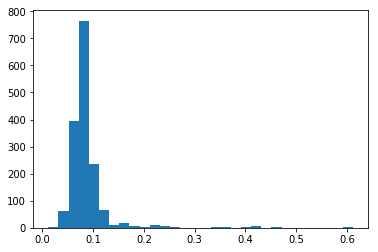

In [19]:
plt.hist(df['chlorides'], bins=30)

(array([ 53., 146., 265., 141., 134., 185., 121.,  85.,  93.,  66.,  85.,
         46.,  36.,  51.,  26.,  14.,  19.,   6.,   3.,   6.,   2.,   8.,
          3.,   1.,   0.,   0.,   0.,   1.,   2.,   1.]),
 array([ 1.        ,  3.36666667,  5.73333333,  8.1       , 10.46666667,
        12.83333333, 15.2       , 17.56666667, 19.93333333, 22.3       ,
        24.66666667, 27.03333333, 29.4       , 31.76666667, 34.13333333,
        36.5       , 38.86666667, 41.23333333, 43.6       , 45.96666667,
        48.33333333, 50.7       , 53.06666667, 55.43333333, 57.8       ,
        60.16666667, 62.53333333, 64.9       , 67.26666667, 69.63333333,
        72.        ]),
 <a list of 30 Patch objects>)

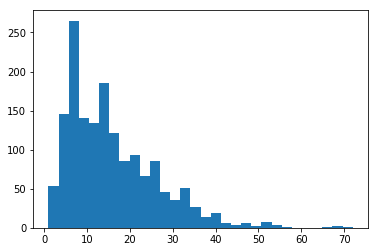

In [20]:
plt.hist(df['free sulfur dioxide'], bins=30)

(array([ 88., 178., 147., 194., 123., 111., 118., 105.,  72.,  65.,  71.,
         40.,  35.,  31.,  44.,  34.,  26.,  18.,  23.,  12.,  12.,  11.,
         12.,   5.,  12.,   7.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.]),
 array([  6.  ,  11.66,  17.32,  22.98,  28.64,  34.3 ,  39.96,  45.62,
         51.28,  56.94,  62.6 ,  68.26,  73.92,  79.58,  85.24,  90.9 ,
         96.56, 102.22, 107.88, 113.54, 119.2 , 124.86, 130.52, 136.18,
        141.84, 147.5 , 153.16, 158.82, 164.48, 170.14, 175.8 , 181.46,
        187.12, 192.78, 198.44, 204.1 , 209.76, 215.42, 221.08, 226.74,
        232.4 , 238.06, 243.72, 249.38, 255.04, 260.7 , 266.36, 272.02,
        277.68, 283.34, 289.  ]),
 <a list of 50 Patch objects>)

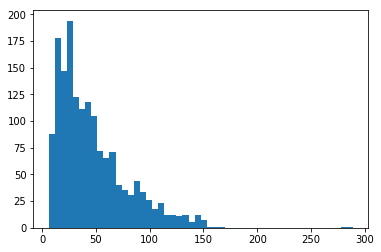

In [31]:
plt.hist(df['total sulfur dioxide'], bins=50)

(array([  3.,   0.,   4.,   0.,   1.,   7.,   3.,   3.,   8.,   6.,   8.,
         12.,  27.,  23.,  20.,  25.,  34.,  49.,  67.,  75.,  81.,  83.,
        113., 111.,  99.,  97., 120.,  79.,  68.,  84.,  41.,  40.,  36.,
         28.,  40.,  22.,  18.,  25.,   6.,   3.,   6.,   8.,   0.,   1.,
          4.,   4.,   0.,   1.,   4.,   2.]),
 array([0.99007  , 0.9903424, 0.9906148, 0.9908872, 0.9911596, 0.991432 ,
        0.9917044, 0.9919768, 0.9922492, 0.9925216, 0.992794 , 0.9930664,
        0.9933388, 0.9936112, 0.9938836, 0.994156 , 0.9944284, 0.9947008,
        0.9949732, 0.9952456, 0.995518 , 0.9957904, 0.9960628, 0.9963352,
        0.9966076, 0.99688  , 0.9971524, 0.9974248, 0.9976972, 0.9979696,
        0.998242 , 0.9985144, 0.9987868, 0.9990592, 0.9993316, 0.999604 ,
        0.9998764, 1.0001488, 1.0004212, 1.0006936, 1.000966 , 1.0012384,
        1.0015108, 1.0017832, 1.0020556, 1.002328 , 1.0026004, 1.0028728,
        1.0031452, 1.0034176, 1.00369  ]),
 <a list of 50 Patch ob

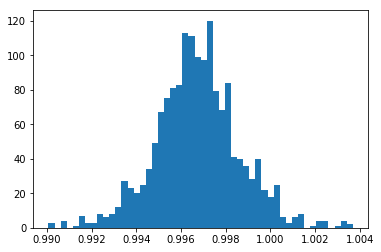

In [22]:
plt.hist(df['density'], bins=50)

(array([  1.,   0.,   1.,   8.,  12.,   7.,  25.,  39.,  70., 104., 121.,
        136., 202., 178., 175., 167.,  99.,  86.,  66.,  39.,  27.,  10.,
         14.,   5.,   2.,   0.,   1.,   2.,   0.,   2.]),
 array([2.74      , 2.78233333, 2.82466667, 2.867     , 2.90933333,
        2.95166667, 2.994     , 3.03633333, 3.07866667, 3.121     ,
        3.16333333, 3.20566667, 3.248     , 3.29033333, 3.33266667,
        3.375     , 3.41733333, 3.45966667, 3.502     , 3.54433333,
        3.58666667, 3.629     , 3.67133333, 3.71366667, 3.756     ,
        3.79833333, 3.84066667, 3.883     , 3.92533333, 3.96766667,
        4.01      ]),
 <a list of 30 Patch objects>)

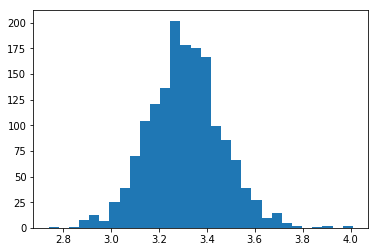

In [24]:
plt.hist(df['pH'], bins=30)

(array([  1.,   8.,  17.,  46.,  79., 151., 178., 174., 223., 129.,  94.,
        113.,  71.,  67.,  71.,  40.,  27.,  31.,   9.,  11.,   7.,   9.,
          6.,   6.,   4.,   8.,   2.,   1.,   2.,   2.,   4.,   0.,   0.,
          0.,   0.,   0.,   1.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   2.,   2.]),
 array([0.33  , 0.3634, 0.3968, 0.4302, 0.4636, 0.497 , 0.5304, 0.5638,
        0.5972, 0.6306, 0.664 , 0.6974, 0.7308, 0.7642, 0.7976, 0.831 ,
        0.8644, 0.8978, 0.9312, 0.9646, 0.998 , 1.0314, 1.0648, 1.0982,
        1.1316, 1.165 , 1.1984, 1.2318, 1.2652, 1.2986, 1.332 , 1.3654,
        1.3988, 1.4322, 1.4656, 1.499 , 1.5324, 1.5658, 1.5992, 1.6326,
        1.666 , 1.6994, 1.7328, 1.7662, 1.7996, 1.833 , 1.8664, 1.8998,
        1.9332, 1.9666, 2.    ]),
 <a list of 50 Patch objects>)

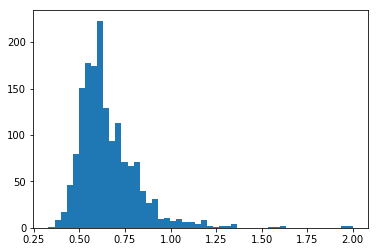

In [26]:
plt.hist(df['sulphates'], bins=50)

(array([  3.,   4.,  30.,  98., 162., 255., 127., 117.,  79., 110.,  56.,
         91., 123.,  64.,  45.,  52.,  42.,  25.,  46.,  15.,  26.,   8.,
          4.,   9.,   0.,   7.,   0.,   0.,   0.,   1.]),
 array([ 8.4       ,  8.61666667,  8.83333333,  9.05      ,  9.26666667,
         9.48333333,  9.7       ,  9.91666667, 10.13333333, 10.35      ,
        10.56666667, 10.78333333, 11.        , 11.21666667, 11.43333333,
        11.65      , 11.86666667, 12.08333333, 12.3       , 12.51666667,
        12.73333333, 12.95      , 13.16666667, 13.38333333, 13.6       ,
        13.81666667, 14.03333333, 14.25      , 14.46666667, 14.68333333,
        14.9       ]),
 <a list of 30 Patch objects>)

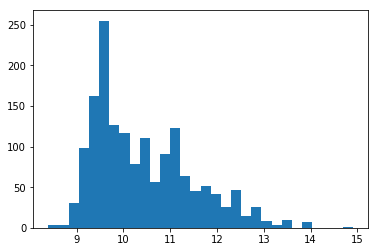

In [29]:
plt.hist(df['alcohol'], bins=30)